<a href="https://colab.research.google.com/github/mmistroni/jupyter/blob/master/GovernmentDataSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import date
import pandas as pd
import requests
!pip install openpyxl
!pip install xlrd==1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


# Statistical DataSets

In [ ]:
#https://www.gov.uk/government/statistical-data-sets
#https://opendatacommunities.org/home
#https://www.ons.gov.uk/economy/economicoutputandproductivity/output#datasets

### Energy Prices  https://www.gov.uk/government/statistical-data-sets/annual-domestic-energy-price-statistics

### Loan delinquencies

### Credit cards https://www.ukfinance.org.uk/data-and-research/data

### Default

### Land Registry for Bought/ Sold Houses

## Fruit and Veg

In [ ]:
#
import csv, urllib.request
import io
from urllib.request import Request, urlopen
import csv, requests
import codecs
from bs4 import BeautifulSoup
import requests

def fetchFruitAndVegPrices():
  baseUrl = 'https://www.gov.uk/government/statistical-data-sets/wholesale-fruit-and-vegetable-prices-weekly-average'
  req = requests.get(baseUrl)
  soup = BeautifulSoup(req.text, "html.parser")
  span = soup.find_all('span', {"class": "download"})[0]
  anchor = span.find_all('a', {"class": "govuk-link"})[0]
  link = anchor.get('href')
  r = requests.get(link).text
  print(f'Link is:{link}')
  dt = pd.read_csv(io.StringIO(r), header=0)
  dt['asOfDate'] = pd.to_datetime(dt['date'], infer_datetime_format=True)
  return dt[dt.asOfDate == dt.asOfDate.max()]

fetchFruitAndVegPrices()



IndexError: list index out of range

## Petrol Prices

In [ ]:
import csv, urllib.request
import io
from urllib.request import Request, urlopen
import csv, requests
import codecs
from bs4 import BeautifulSoup
import requests
import pandas as pd
from itertools import chain

def get_petrol_prices():
  url = 'https://www.gov.uk/government/statistics/weekly-road-fuel-prices'
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "html.parser")
  span = soup.find_all('div', {"data-module": "govspeak"})[0]
  anchors = [span.find_all('a', {"class": "govuk-link"})]
  #links = [anchor.get('href') for anchor in anchors]

  links = list(chain(*anchors))

  link =  [a.get('href') for a in links if a.get('href', '').endswith('csv')][0]
  print(f'Link is :{link}')
  r = requests.get(link).text
  dt = pd.read_csv(io.StringIO(r), header=2)[-1:][['Date','ULSP', 'ULSD']]
  dt.set_index('Date', inplace=True)
  return dt

get_petrol_prices()






Link is :https://assets.publishing.service.gov.uk/media/659c1eb0614fa20014f3aa57/weekly_fuel_prices_080124.csv


,ULSP,ULSD
Date,,
08/01/2024,139.72,148.21


## Job Adverts
### https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/onlinejobadvertestimates

In [ ]:
# Need to use beautifulsoup to download data
# https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/onlinejobadvertestimates/2022
#https://cy.ons.gov.uk/datasets/online-job-advert-estimates/editions/time-series/versions/20
import requests
from bs4 import BeautifulSoup
import openpyxl

import requests
from bs4 import BeautifulSoup
import openpyxl
#excel_data = pd.read_excel('https://download.ons.gov.uk/downloads/datasets/online-job-advert-estimates/editions/time-series/versions/20.xlsx',
#                           engine='openpyxl')




### Latest Job Adverts

In [ ]:
from urllib.request import Request, urlopen
import csv, requests
from datetime import date
import codecs
#req = Request('https://download.ons.gov.uk/downloads/datasets/online-job-advert-estimates/editions/time-series/versions/20.csv',     headers={'User-Agent': 'Mozilla/5.0'})
from bs4 import BeautifulSoup
import requests

def get_latest_url():
  url = "https://cy.ons.gov.uk/datasets/online-job-advert-estimates/editions"
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "html.parser")
  anchor = soup.find_all('a', {"id": "edition-time-series"})[0]
  suffix = anchor.get('href')
  return f'https://download.ons.gov.uk/downloads{suffix}.csv'


def get_latest_jobs_statistics():
  latestUrl = get_latest_url()
  print(f'Latest URL from ONS is {latestUrl}')
  res = requests.get(latestUrl, headers={'User-Agent': 'Mozilla/5.0'})
  # 'https://download.ons.gov.uk/downloads/datasets/online-job-advert-estimates/editions/time-series/versions/20.csv'
  text = res.iter_lines()
  data = csv.reader(codecs.iterdecode(text, 'utf-8'), delimiter=',')
  headers = ['v4_1',	'Data Marking', 	'calendar-years',	'Time',	'uk-only',	'Geography', 'adzuna-jobs-category',	'AdzunaJobsCategory',	'week-number',	'Week']
  dataset = [d for d in data]
  jobs_dataset = pd.DataFrame(dataset, columns=headers)
  valid = jobs_dataset[(jobs_dataset.Time == str(date.today().year)) & (jobs_dataset.AdzunaJobsCategory.str.contains('Computing'))]
  valid[['wk', 'wkno']] = valid['week-number'].str.split(pat = '-', expand = True)
  filtered = valid[valid.v4_1.str.contains('.')]
  filtered['wkint'] = filtered.wkno.apply(lambda v: int(v))
  return filtered.sort_values(by=['wkint'])

ds = get_latest_jobs_statistics()
ds
#for l in webpage.readlines():
#  print (l)
#pd.read_html('https://download.ons.gov.uk/downloads/datasets/online-job-advert-estimates/editions/time-series/versions/20.csv')

Latest URL from ONS is https://download.ons.gov.uk/downloads/datasets/online-job-advert-estimates/editions/time-series/versions/20.csv


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,v4_1,Data Marking,calendar-years,Time,uk-only,Geography,adzuna-jobs-category,AdzunaJobsCategory,week-number,Week,wk,wkno,wkint
5498,133.3,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-1,Week 01,week,1,1
1248,141,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-2,Week 02,week,2,2
7008,148.3,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-3,Week 03,week,3,3
1537,158,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-4,Week 04,week,4,4
3307,161.6,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-5,Week 05,week,5,5
4427,166.4,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-6,Week 06,week,6,6
7495,160.5,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-7,Week 07,week,7,7
4287,166.5,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-8,Week 08,week,8,8
224,163.4,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-9,Week 09,week,9,9
5387,160.3,,2022,2022,K02000001,United Kingdom,it-computing-software,IT / Computing / Software,week-10,Week 10,week,10,10


In [ ]:

from bs4 import BeautifulSoup
import requests
url = "https://cy.ons.gov.uk/datasets/online-job-advert-estimates/editions"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
anchor = soup.find_all('a', {"id": "edition-time-series"})[0]
anchor.get('href')

'/datasets/online-job-advert-estimates/editions/time-series/versions/20'

In [ ]:
pimport urllib
#https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/jobsandvacanciesintheuk/latest
#
#https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/jobsandvacanciesintheuk/latest
urllib.request.urlopen('https://www.ons.gov.uk/file?uri=/economy/economicoutputandproductivity/output/datasets/onlinejobadvertestimates/2022/onlinejobadvertestimatesdataset05052022.xlsx').geturl()

## Energy Prices


#https://marketwatch.zenergi.co.uk/price/01-06-2022/







### Testing a Random dataset

In [ ]:
from bs4 import BeautifulSoup
import requests
url = "https://marketwatch.zenergi.co.uk/prices/"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
anchor = soup.find_all('h3', {"class": "elementor-post__title"})

[a for an in anchor for a in an.find('a')]





['\n\t\t\t\t01-06-2022\t\t\t',
 '\n\t\t\t\t31-05-2022\t\t\t',
 '\n\t\t\t\t30-05-2022\t\t\t',
 '\n\t\t\t\t27-05-2022\t\t\t',
 '\n\t\t\t\t26-05-2022\t\t\t',
 '\n\t\t\t\t25-05-2022\t\t\t',
 '\n\t\t\t\t24-05-2022\t\t\t',
 '\n\t\t\t\t23-05-2022\t\t\t',
 '\n\t\t\t\t20-05-2022\t\t\t',
 '\n\t\t\t\t19-05-2022\t\t\t']

In [ ]:
excel_data

In [ ]:
import math

In [ ]:
def compute(fun, input):
  return fun(math.radians(input))

In [ ]:
math.sin(math.radians(99))

0.9876883405951378

In [ ]:
14 * math.sin(math.radians(67)) / math.sin(math.radians(64))

14.338176806352203

In [ ]:
a= 12*12 + 10.5*10.5 - 2 * 12 * 10.5 * math.cos(math.radians(53))

In [ ]:
a

102.59261416568381

In [ ]:
5 * math.sin(math.radians(78))

4.890738003669028

In [ ]:
math.sin(99)

-0.9992068341863537

In [ ]:
import matplotlib.pyplot as plt
from fredapi import Fred

# Replace with your FRED API key
fred = Fred("db6028915c8fde26a4ab706240814c11")

# Retrieve 10-Year Treasury Constant Maturity Rate (DGS10) data from FRED
interest_rate_data = fred.get_series("DGS10", start="2014-01-01", end="2023-12-31")
interest_rate_data = interest_rate_data[interest_rate_data.index > '2014-01-01']

# Create the chart


#### MOr eeconomic data

https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/ukspendingoncreditanddebitcards

https://www.ons.gov.uk/economy/economicoutputandproductivity/output/bulletins/economicactivityandsocialchangeintheukrealtimeindicators/latest

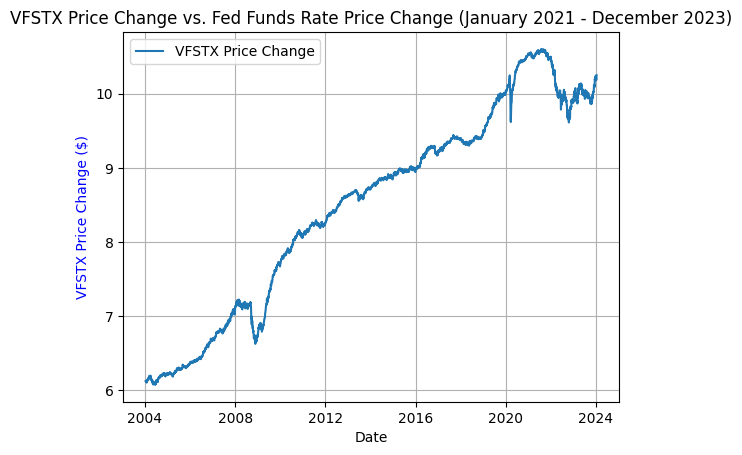

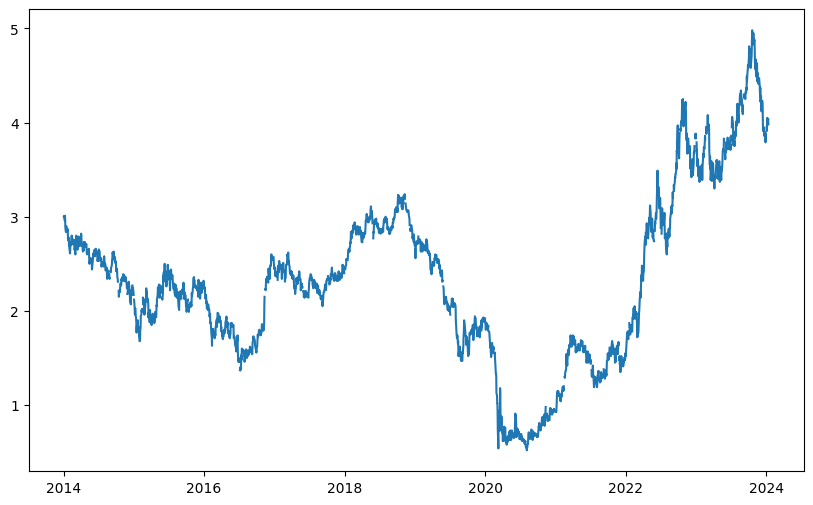

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Retrieve data for VFSTX
vfstx = yf.Ticker("VFSTX")
vfstx_data = vfstx.history(period="20y")
#vfstx_data = vfstx_data.resample('M')
# Calculate price change from first day for VFSTX
#first_day_vfstx_price = vfstx_data["Close"].iloc[0]
#vfstx_data["Price Change"] = vfstx_data["Close"] - first_day_vfstx_price

# Retrieve Fed Funds Rate data (using FRED data for example)
fed_funds_rate = yf.Ticker("SPTL")
fed_funds_data = fed_funds_rate.history(period="3y")

# Calculate price change from first day for Fed Funds Rate
first_day_fed_funds_rate = fed_funds_data["Close"].iloc[0]
fed_funds_data["Price Change"] = fed_funds_data["Close"] - first_day_fed_funds_rate

# Create the dual-axis line chart
fig, ax1 = plt.subplots()

# Plot VFSTX price change on the primary axis
ax1.plot(vfstx_data.index, vfstx_data["Close"], label="VFSTX Price Change")
ax1.set_ylabel("VFSTX Price Change ($)", color="blue")

# Plot Fed Funds Rate price change on the secondary axis
#ax2 = ax1.twinx()
#ax2.plot(fed_funds_data.index, fed_funds_data["Price Change"], label="Fed Funds Rate Price Change", color="red")
#ax2.set_ylabel("Fed Funds Rate Price Change (%)", color="red")  # Note the unit difference

# Add title and legend
plt.title("VFSTX Price Change vs. Fed Funds Rate Price Change (January 2021 - December 2023)")
plt.legend()

# Customize chart appearance (optional)
plt.xlabel("Date")
plt.grid(True)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(interest_rate_data.index, interest_rate_data.values)


plt.show()

In [ ]:
!pip install fredapi

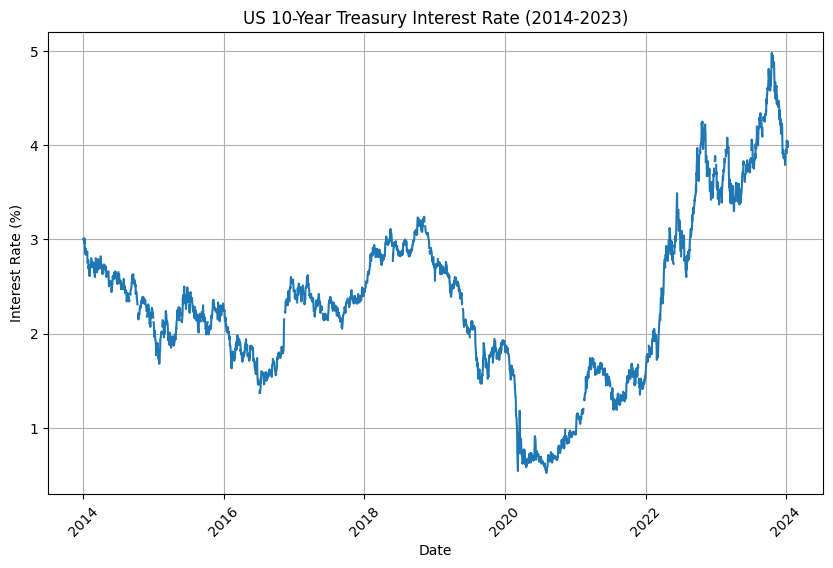

In [ ]:
import matplotlib.pyplot as plt
from fredapi import Fred

# Replace with your FRED API key
fred = Fred("db6028915c8fde26a4ab706240814c11")

# Retrieve 10-Year Treasury Constant Maturity Rate (DGS10) data from FRED
interest_rate_data = fred.get_series("DGS10", start="2014-01-01", end="2023-12-31")
interest_rate_data = interest_rate_data[interest_rate_data.index > '2014-01-01']

# Create the chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(interest_rate_data.index, interest_rate_data.values)

# Chart customization
plt.title("US 10-Year Treasury Interest Rate (2014-2023)")
plt.ylabel("Interest Rate (%)")
plt.xlabel("Date")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed
Best 2-year return: 4.49%
Start date: 2020-03-24
End date: 2020-04-28
[*********************100%%**********************]  1 of 1 completed
Average US interest rate: 0.68%


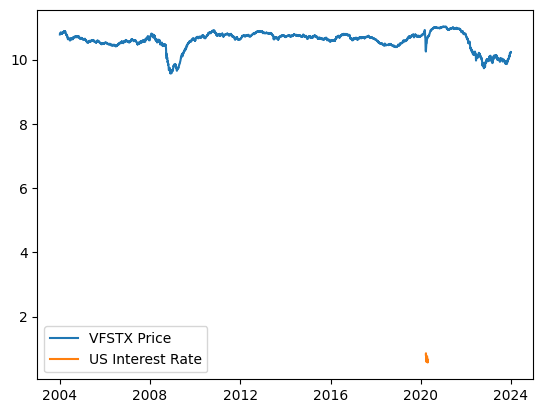

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Set start and end date for a 20-year data window
start_date = "2004-01-01"
end_date = "2023-12-31"

# Download VFSTX data
vfstx_data = yf.download("VFSTX", start=start_date, end=end_date)

# Iterate through all 2-year rolling windows
best_two_year_return = 0
best_start_date = None
best_end_date = None
for i in range(len(vfstx_data) - 24):
    two_year_return = (vfstx_data["Close"][i + 24] - vfstx_data["Close"][i]) / vfstx_data["Close"][i]
    if two_year_return > best_two_year_return:
        best_two_year_return = two_year_return
        best_start_date = vfstx_data.index[i]
        best_end_date = vfstx_data.index[i + 24]

# Print results
print(f"Best 2-year return: {best_two_year_return * 100:.2f}%")
print(f"Start date: {best_start_date.strftime('%Y-%m-%d')}")
print(f"End date: {best_end_date.strftime('%Y-%m-%d')}")

# Retrieve US interest rate data (approximate method)
# (Replace with your preferred interest rate series and data source)
interest_rate_data = yf.download("^TNX", start=best_start_date, end=best_end_date)
average_interest_rate = interest_rate_data["Close"].mean()

# Print average interest rate during the period
print(f"Average US interest rate: {average_interest_rate:.2f}%")

# (Optional) Plot VFSTX price and interest rate data for visualization
plt.plot(vfstx_data["Close"], label="VFSTX Price")
plt.plot(interest_rate_data["Close"], label="US Interest Rate")
plt.legend()
plt.show()


In [1]:
from urllib.request import Request, urlopen
import csv, requests
from datetime import date
import codecs
#req = Request('https://download.ons.gov.uk/downloads/datasets/online-job-advert-estimates/editions/time-series/versions/20.csv',     headers={'User-Agent': 'Mozilla/5.0'})
from bs4 import BeautifulSoup
import requests

def get_latest_url():
  url = "https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/ukspendingoncreditanddebitcards"
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "html.parser")
  return soup.find_all('a')


def get_latest_jobs_statistics():
  latestUrl = get_latest_url()
  print(f'Latest URL from ONS is {latestUrl}')
  res = requests.get(latestUrl, headers={'User-Agent': 'Mozilla/5.0'})
  # 'https://download.ons.gov.uk/downloads/datasets/online-job-advert-estimates/editions/time-series/versions/20.csv'
  text = res.iter_lines()
  data = csv.reader(codecs.iterdecode(text, 'utf-8'), delimiter=',')
  headers = ['v4_1',	'Data Marking', 	'calendar-years',	'Time',	'uk-only',	'Geography', 'adzuna-jobs-category',	'AdzunaJobsCategory',	'week-number',	'Week']
  dataset = [d for d in data]
  jobs_dataset = pd.DataFrame(dataset, columns=headers)
  valid = jobs_dataset[(jobs_dataset.Time == str(date.today().year)) & (jobs_dataset.AdzunaJobsCategory.str.contains('Computing'))]
  valid[['wk', 'wkno']] = valid['week-number'].str.split(pat = '-', expand = True)
  filtered = valid[valid.v4_1.str.contains('.')]
  filtered['wkint'] = filtered.wkno.apply(lambda v: int(v))
  return filtered.sort_values(by=['wkint'])

links = get_latest_url()

from pprint import pprint
first = [l.get('href') for l in links if l.get('aria-label') is not None and 'Download UK spending on credit' in l.get('aria-label') ][0]
first

'/file?uri=/economy/economicoutputandproductivity/output/datasets/ukspendingoncreditanddebitcards/2024/ukspendingoncreditanddebitcardsdataset180124.xlsx'

In [ ]:
import pandas as pd
storage_options = {'User-Agent': 'Mozilla/5.0'}
#df = pd.read_csv(url, storage_options=storage_options)
pd.read_excel('https://www.ons.gov.uk/file?uri=/economy/economicoutputandproductivity/output/datasets/ukspendingoncreditanddebitcards/2024/ukspendingoncreditanddebitcardsdataset110124.xlsx',
              storage_options=storage_options, sheet_name='Weekly CHAPS indices SA', header=3)

,Date,Aggregate,Delayable,Social,Staple,Work Related
0,2020-01-16,108.529287,126.287928,109.4169,92.001981,88.322147
1,2020-01-23,109.717174,128.698206,113.018511,93.421328,93.194428
2,2020-01-30,110.067170,130.630207,110.991011,93.800544,93.976853
3,2020-02-06,107.844675,127.002197,115.183044,92.195625,92.09107
4,2020-02-13,107.313701,126.907715,111.904614,91.891082,93.316865
...,...,...,...,...,...,...
203,2023-12-07,104.186288,88.224659,107.840101,112.887632,118.609221
204,2023-12-14,103.072525,89.822177,107.782529,110.354843,113.628158
205,2023-12-21,104.015707,100.900105,103.08577,108.54304,111.022548
206,2023-12-28,112.587122,109.457279,105.632159,114.040651,118.988336


### Energy Prices

## Credit and Debit Card spending

In [12]:
import requests
import pandas as pd

url = 'https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/ukspendingoncreditanddebitcards'
req = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(req.text, "html.parser")

hrefs = soup.find_all('a')
latest = [link.get('href').split('?')[1] for link in hrefs if link.get('aria-label') is not None and 'Download' in link.get('aria-label')][0]
#https://www.ons.gov.uk/file?uri=/economy/economicoutputandproductivity/output/datasets/ukspendingoncreditanddebitcards/2024/ukspendingoncreditanddebitcardsdataset180124.xlsx


In [2]:
url = 'https://www.ons.gov.uk/economy/economicoutputandproductivity/output/bulletins/economicactivityandsocialchangeintheukrealtimeindicators/latest'

req = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(req.text, "html.parser")
energydiv  = soup.find_all('div' , {'id' : 'energy'})[0]

anchors = [a for a in energydiv.find_all('a') if 'System' in a.text]
gaspage = anchors[0].get('href')
#
print(f' Now accessing {gaspage}')
gasreq = requests.get(gaspage, headers={'User-Agent': 'Mozilla/5.0'})
gassoup = BeautifulSoup(req.text, "html.parser")
anchorsgas = gassoup.find_all('a')

anchorsgas = [a for a in anchorsgas if a.get('aria-label') is not None]
first = [l.get('href') for l in anchorsgas if l.get('aria-label') is not None and 'uri=' in l.get('href') and l.get('href').endswith('csv')]# and  l.get('aria-label').endswith('gas') ]
from pprint import pprint
pprint(first)

 Now accessing https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/systemaveragepricesapofgas
['/generator?uri=/economy/economicoutputandproductivity/output/bulletins/economicactivityandsocialchangeintheukrealtimeindicators/18january2024/4092004e&format=csv']


In [4]:
import pandas as pd
pd.read_csv('https://www.ons.gov.uk/file?uri=/economy/economicoutputandproductivity/output/bulletins/economicactivityandsocialchangeintheukrealtimeindicators/18january2024/4092004e&format=csv',
                  storage_options= {'User-Agent': 'Mozilla/5.0'})

HTTPError: HTTP Error 404: Not Found

In [5]:
import pandas as pd
# We need to parse


pd.read_excel('https://www.ons.gov.uk/file?uri=/economy/economicoutputandproductivity/output/datasets/systemaveragepricesapofgas/2024/systemaveragepriceofgasdataset110124.xlsx',
             #'https://www.ons.gov/economy/economicoutputandproductivity/output/bulletins/economicactivityandsocialchangeintheukrealtimeindicators/11january2024/e7eaba38&format=csv',
             storage_options= {'User-Agent': 'Mozilla/5.0'}, sheet_name='Data', header=4)

,Date,SAP actual day\n(p/kWh),SAP preceding seven-day rolling average\n(p/kWh),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2018-01-01,1.7083,1.8474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,1.7331,1.8318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,1.7663,1.8019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,1.7719,1.7835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,1.7601,1.7608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2193,2024-01-03,2.6722,2.5828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2194,2024-01-04,2.9290,2.5797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2195,2024-01-05,2.9712,2.6109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2196,2024-01-06,2.9129,2.6526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
